# Reto computacional - La órbita de un asteroide



Partiendo únicamente de los elementos orbitales de un asteroide (por ejemplo, el asteroide Jorgezuluaga) dibujar la órbita a la manera en la que lo hace el visualizador de órbitas de JPL (ver enlace y captura de pantalla adjunta).

Condiciones:
* La posición del asteroide debe ser calculada a partir de los elementos orbitales sin usar Horizons.
* Deben aparecer las barras verticales que indican la altura del asteroide sobre el plano de la eclíptica.
* Debe incluir la órbita de los planetas hasta Marte. Puede usar Horizons para la posición de los planetas.
* Debe tener fondo negro y no deben aparecer los ejes coordenados.
Entregable: notebook de Jupyter con la solución debidamente explicada.

* Usando los resultados de clase, tenemos que para cualquier cónica la ecuación de la trayectoria en coordenadas polares es:

$$r= \frac{p}{1+ecosf} = \frac{h^{2}/\mu}{1+ecosf}$$

* Partiendo de la definción de la matriz de rotación tenemos que:
\begin{equation*}
R_{z} (\theta) =
\begin{bmatrix}
\cos(\theta) & \sin(\theta) & 0 \\
-\sin(\theta) & \cos(\theta) & 0 \\
0 & 0 & 1
\end{bmatrix}
\end{equation*}

Esta es la matriz de rotación en el ángulo $\theta$ alrededor del eje $z$ en dirección contraria a la manecillas del reloj.
* Con esta información se puede definir un matriz de rotacion general:
\begin{equation*}
\begin{pmatrix}
x'''\\
y'''\\
z'''
\end{pmatrix}
=
M\left ( \omega,i,\Omega \right )
\begin{pmatrix}
x\\
y\\
z
\end{pmatrix}
\end{equation*}

Donde $M\left ( \omega,i,\Omega \right )=R_{z} (\omega)R_{x} (i)R_{z} (\Omega)$
, su inversa sera:

$$
M^{-1}(\omega, i, \Omega) = R_{z}(-\Omega) R_{z}(-\omega) R_{x}(-i)
$$




In [ ]:
!pip install -Uq pymcel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.6/997.6 kB 29.6 MB/s eta 0:00:00


In [ ]:
# Librerias necesarias
import pymcel as pc
import numpy as np
import matplotlib.pyplot as plt
import spiceypy as spy

pymcel version  0.6.24


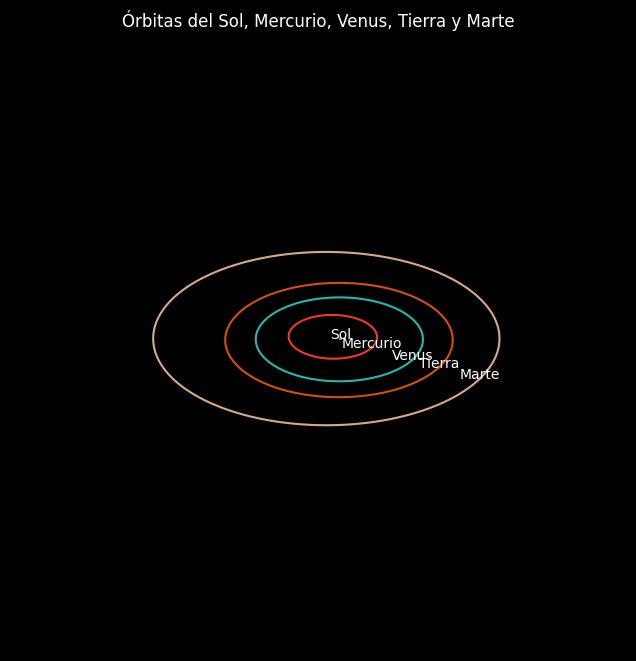

In [ ]:
# Códigos de objeto para cada cuerpo celeste
cuerpos = {
    'Sol': '10',
    'Mercurio': '199',
    'Venus': '299',
    'Tierra': '399',
    'Marte': '499'
}

# Crear la figura y el eje 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Establecer el color del fondo a negro
ax.set_facecolor('black')
fig.patch.set_facecolor('black')

# Definir el número de puntos en la órbita
fs = np.linspace(0, 2 * np.pi, 1000)  # Anomalía verdadera

# Graficar la órbita de cada cuerpo celeste
for nombre, id in cuerpos.items():
    # Obtener los elementos orbitales
    tabla, df, datos_ = pc.consulta_horizons(
        id=id,
        location='@0',
        epochs='2017-09-01 00:00:00',
        datos='elements',
        propiedades='default'
    )

    # Extraer los elementos orbitales
    a = datos_[0]  # Semi-eje mayor
    e = datos_[1]  # Excentricidad
    I = np.radians(datos_[2])  # Inclinación en radianes
    W = np.radians(datos_[3])  # Longitud del nodo ascendente en radianes
    w = np.radians(datos_[4])  # Argumento del periastro en radianes

    # Cálculo de la distancia radial en función de la anomalía verdadera
    r = a * (1 - e**2) / (1 + e * np.cos(fs))

    # Coordenadas en el plano orbital
    x_orbita = r * np.cos(fs)
    y_orbita = r * np.sin(fs)

    # Transformación a coordenadas 3D
    x = x_orbita
    y = y_orbita * np.cos(I)  # Proyección en el plano XY
    z = np.zeros_like(x_orbita)  # Proyección en Z

    # Graficar la órbita
    ax.plot(x, y, z, label=f'Órbita de {nombre}', color=np.random.rand(3,))

    # Añadir nombres de los planetas
    ax.text(x[-1], y[-1], z[-1], nombre, color='white', fontsize=10, ha='center')


# Título visible
ax.set_title('Órbitas del Sol, Mercurio, Venus, Tierra y Marte', color='white')
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_zlabel('z', fontsize=20)

# Desactivar el sistema de ejes
plt.axis('off')
# Mostrar la gráfica
plt.show()

In [ ]:
# Diccionario que contiene los elementos orbitales de varios cuerpos celestes
# y sus parámetros correspondientes.
elementos_orbitales = {
    'Sol': {
        'a': 0,
        'e': 0,
        'I': 0,
        'W': 0,
        'w': 0
    },
    'Mercurio': {
        'a': 0.38709893,
        'e': 0.20563593,
        'I': 7.004979,
        'W': 48.330765,
        'w': 74.005965
    },
    'Venus': {
        'a': 0.72333096,
        'e': 0.00677672,
        'I': 3.394676,
        'W': 76.679923,
        'w': 131.602385
    },
    'Tierra': {
        'a': 1.000001018,
        'e': 0.01671123,
        'I': -0.00001531,
        'W': 0.0,
        'w': 102.937686
    },
    'Marte': {
        'a': 1.52366232,
        'e': 0.09339407,
        'I': 1.849691,
        'W': 49.559967,
        'w': 336.024692
    },
    'Jorge Zuluaga': { 'a':  3.060536062812242,
                        'e':  0.2888843950104402,
                        'I': 18.91037672595848 ,
                        'W': 94.04406374073943 ,
                        'w': 106.9919529813137
    }
}

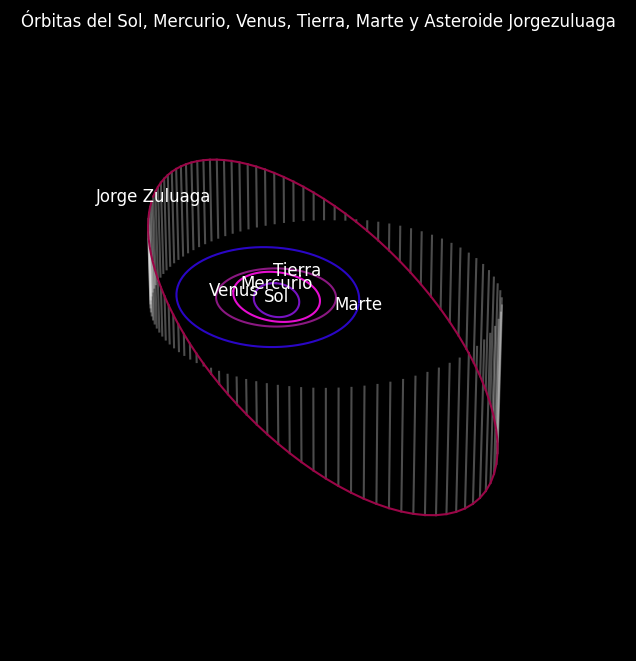

In [ ]:
# Conversión de grados a radianes
deg = np.pi / 180
rad = 1 / deg

# Crear la figura, el eje 3D  y un fondo negro
fig = plt.figure(figsize=(10, 8), facecolor ='black')

# Se agrega un subplot 3D a la figura, también con fondo negro
ax = fig.add_subplot(111, projection='3d', facecolor = 'black')

# Iterar sobre los elementos orbitales
for nombre, datos in elementos_orbitales.items():
    # Parámetros orbitales para cada objeto
    a = datos['a']  # Semi-eje mayor
    e = datos['e']  # Excentricidad de la órbita
    I = datos['I']*deg  # Inclinación de la órbita
    W = datos['W']*deg  # Longitud del nodo ascendente
    w = datos['w']*deg  # Argumento del perihelio

    # Vvalores de la anomalía media (fs) para la órbita
    fs = np.linspace(0, 2*np.pi, 1000)

    # Cálculo de la distancia radial en cada punto de la órbita (Ley de Kepler)
    p = a*(1-e**2)  # Parámetro de la órbita
    rs = p / (1 + e * np.cos(fs))  # Radio en cada posición angular

    # Coordenadas cartesianas de la órbita en el plano orbital (x, y)
    xppps = rs * np.cos(fs)
    yppps = rs * np.sin(fs)
    zppps = np.zeros_like(xppps)  #  z = 0 para el plano orbital x-y

    # Realiza las rotaciones que corresponden a la orientación de la órbita en el espacio
    # Rotación por el argumento del perihelio alrededor del eje z
    Rzmw = spy.rotate(-w, 3)

    # Rotación por la inclinación alrededor del eje x
    Rxmi = spy.rotate(-I, 1)

    # Rotación por la longitud del nodo ascendente alrededor del eje z
    RzmW = spy.rotate(-W, 3)

    # Matriz de transformación total (producto de las tres rotaciones)
    MT = spy.mxm(RzmW, spy.mxm(Rxmi, Rzmw))

    # Inicializar listas vacías para almacenar las coordenadas transformadas
    x, y, z = [], [], []

    # Transformar las coordenadas de la órbita para cada valor de fs
    for i in range(len(fs))[::10]:
        # Aplicar la matriz de transformación a las coordenadas originales
        r = spy.mxv(MT, [xppps[i], yppps[i], zppps[i]])
         # Guardar la coordenada x,y,z transformada
        x.append(r[0])
        y.append(r[1])
        z.append(r[2])

        # Si el nombre del objeto es 'Jorge Zuluaga', dibujar una línea
        #desde z=0 hasta el punto de la órbita
        if nombre == 'Jorge Zuluaga':
            ax.plot([r[0], r[0]], [r[1], r[1]], [r[2], 0], color='white', alpha=0.3)

    # Graficar la órbita en el espacio 3D con un color aleatorio
    ax.plot(x, y, z, label=f'Órbita de {nombre}', color=np.random.rand(3,))

    # Colocar el nombre en la posición del primer punto de la órbita transformada (r[0], r[1], r[2])
    ax.text(r[0], r[1], r[2], nombre, color='white', fontsize=12, ha='center', va='center')

# Configuración de etiquetas de los ejes
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_zlabel('z', fontsize=20)

# Título del gráfico con texto en blanco
ax.set_title('Órbitas del Sol, Mercurio, Venus, Tierra, Marte y Asteroide Jorgezuluaga', color='white')

# Desactivar el sistema de ejes para un visualizado más limpio
plt.axis('off')

# Mostrar el gráfico generado
plt.show()